### Bootstrapping

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import scipy
import scikits.bootstrap as bootstrap

In [3]:
gauss = pd.Series(np.random.normal(loc = 5.0, scale = 1.0, size = 100)) 
data = np.exp(gauss)

In [4]:
CIs = bootstrap.ci(data=data, statfunction=scipy.mean)  
print "Bootstrapped 95% confidence intervals\nLow:", CIs[0], "\nHigh:", CIs[1] 

Bootstrapped 95% confidence intervals
Low: 218.883792776 
High: 340.115291383


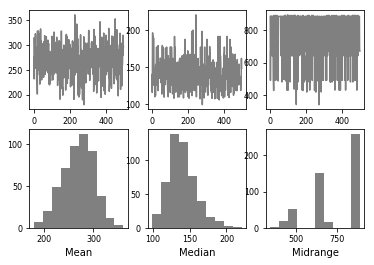

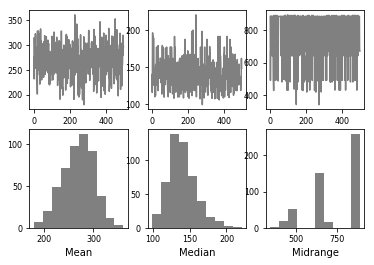

In [5]:
from pandas.tools.plotting import bootstrap_plot
bootstrap_plot(data, size=50, samples=500, color='grey')

In [6]:
import random

def some(x, n):
    return x.ix[np.random.choice(x.index, n)]

In [7]:
est_list = []
for i in range(100):    
    boot1 = some(gauss,50)
    mean = boot1.mean()
    est = np.exp(mean)
    est_list.append(est)

(array([  5.,  13.,  14.,  10.,  14.,  15.,  10.,  10.,   8.,   1.]),
 array([ 110.87073816,  121.63604299,  132.40134782,  143.16665265,
         153.93195748,  164.69726232,  175.46256715,  186.22787198,
         196.99317681,  207.75848164,  218.52378647]),
 <a list of 10 Patch objects>)

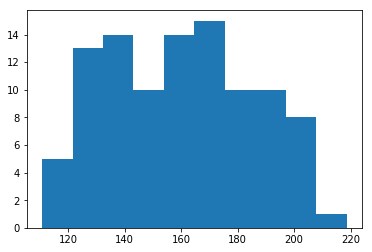

In [8]:
plt.hist(est_list)

Compares pretty well to median of bootstrap estimate. 

### zipf distrubution comparison 

In [9]:
#Generate zipf
from fractions import Fraction
def calc_harmonic(n):
    return sum(1./(d+10) for d in range(1, n + 1))

In [74]:
import random

In [56]:
h = calc_harmonic(10000)
print h

6.85963723246


In [60]:
c = 1/(h)
print c

0.145780303843


In [42]:
#zipf = np.random.zipf(10000, size=15000)

In [62]:
# make probability distribution
probs = []
for i in range(10000):
    prob = c/(i+10)
    probs.append(prob)

In [63]:
sum(probs)

1.0145634669173744

In [69]:
cdf = np.cumsum(probs)
print cdf

[ 0.01457803  0.02783079  0.03997914 ...,  1.01453434  1.0145489
  1.01456347]


(array([   11.,    20.,    41.,    81.,   161.,   320.,   634.,  1261.,
         2502.,  4969.]),
 array([ 0.01457803,  0.11457657,  0.21457512,  0.31457366,  0.4145722 ,
         0.51457075,  0.61456929,  0.71456784,  0.81456638,  0.91456492,
         1.01456347]),
 <a list of 10 Patch objects>)

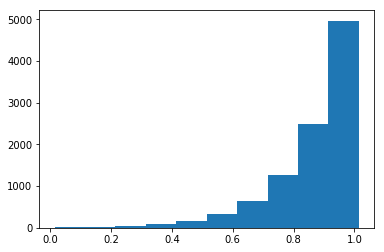

In [68]:
plt.hist(cdf)

In [102]:
def sample():
    r = random.random()
    for i,c in enumerate(cdf):
        if r <= c:
            return i

In [103]:
zipf1 = []
for i in range(15000):
    y = sample()
    zipf1.append(y)

In [121]:
# predict number of unseen samples
zipf_5000 = zipf1[:5000]


In [123]:
def list_to_dict(li):  
    dct = {}  
    for item in li:  
        if dct.has_key(item):  
             dct[item] = dct[item] + 1  
        else:  
             dct[item] = 1  
    return dct  

In [124]:
dic_z = list_to_dict(zipf_5000)  

In [127]:
sumphi= sum(dic_z.values())

In [138]:
#Gt estimator
def gt_est():
    return(np.sum(-10^i) for i in range(1, 10000))

In [105]:
#Plot number of unseen items in the remaining as t is varied (chunks of 500)
zipf_rest = zipf1[5000:]
set1 = set(zipf_5000)

In [106]:
chunks = [zipf_rest[0:x+500] for x in xrange(0, len(zipf_rest), 500)]

In [109]:
unseens = []
for chunk in chunks:
    set2 = set(chunk)
    unseen = len(set2.difference(set1))
    unseens.append(unseen)

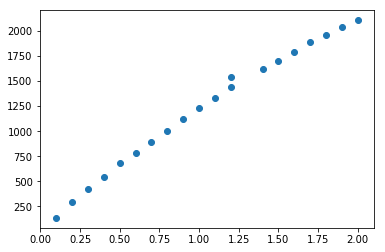

In [119]:
t = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.2,1.4,1.5,1.6,1.7,1.8,1.9,2]
plt.scatter(t,unseens)